# 1. 데이터 불러오기와 데이터셋 나누기
### Calling the Data and Dividing them


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [3]:
data=pd.read_csv('상장비상장(2008_2013).csv',header=None,skiprows=1,encoding='utf-8')

In [4]:
X = data.iloc[:,2:37].values
y = data.iloc[:,[37]].values 

In [5]:
train_indices = []
test_indices = []

for index,element in data.iterrows():
    if element[1] == 2013:
        test_indices.append(index)
    else:
        train_indices.append(index)
        
train_indices=np.array(train_indices)
train_indices=np.int_(train_indices)
test_indices=np.array(test_indices)
test_indices=np.int_(test_indices)

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]  

In [6]:
# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

# train데이터를 넣어 복제함
X_train, y_train = sm.fit_sample(X_train,list(y_train))

# 2. Random Search 

In [7]:
from sklearn.model_selection import RandomizedSearchCV

In [8]:
from scipy.stats import randint

In [9]:
param_distribs = {'max_depth': randint(low=1, high=20), 
                  'min_samples_leaf': randint(low=1, high=50)}

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
random_search=RandomizedSearchCV(DecisionTreeClassifier(), 
                                 param_distributions=param_distribs, cv=5)

In [12]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002890B16FDD8>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002890B1252B0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [13]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'max_depth': 8, 'min_samples_leaf': 21}


In [14]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.884


In [15]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.905


In [16]:
result_random = random_search.cv_results_

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree=DecisionTreeClassifier(max_depth=10, min_samples_leaf=21)

In [19]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=21, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
import graphviz

In [21]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [22]:
# Build a Tree here
t=['취약기업여부', '유명감사인', '영업현금흐름', '상장여부_비상장', '상장여부_상장', '상장여부_상장관리',
       '상장여부_코스닥', '상장여부_코스닥관리', '감사의견_감사미필', '감사의견_부적정(기업회계기준위배-회계처리)',
       '감사의견_의견거절', '감사의견_의견거절(감사범위제한)', '감사의견_의견거절(계속기업존속의문시)', '감사의견_적정',
       '감사의견_한정(감사범위제한)', '감사의견_한정(기업회계기준위배)', 'KIS신용등급', 'kdb신용등급수정',
       '자산건전성수정', '부채비율 ', '매출액영업이익율', 'LN(자산규모)', '매출액증가율', '자기자본순익',
       '순이익증가율', '총자본회전율', '총자본순이익율', '총자산증가율', '자기자본증가율', '영업이익증가율',
       '총자본영업이익율', '자본금순이익율', '매출액순이익율', '자기자본비율', '자기자본회전율']

In [23]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["비연체", "연체"],feature_names=t, impurity=False, filled=True)

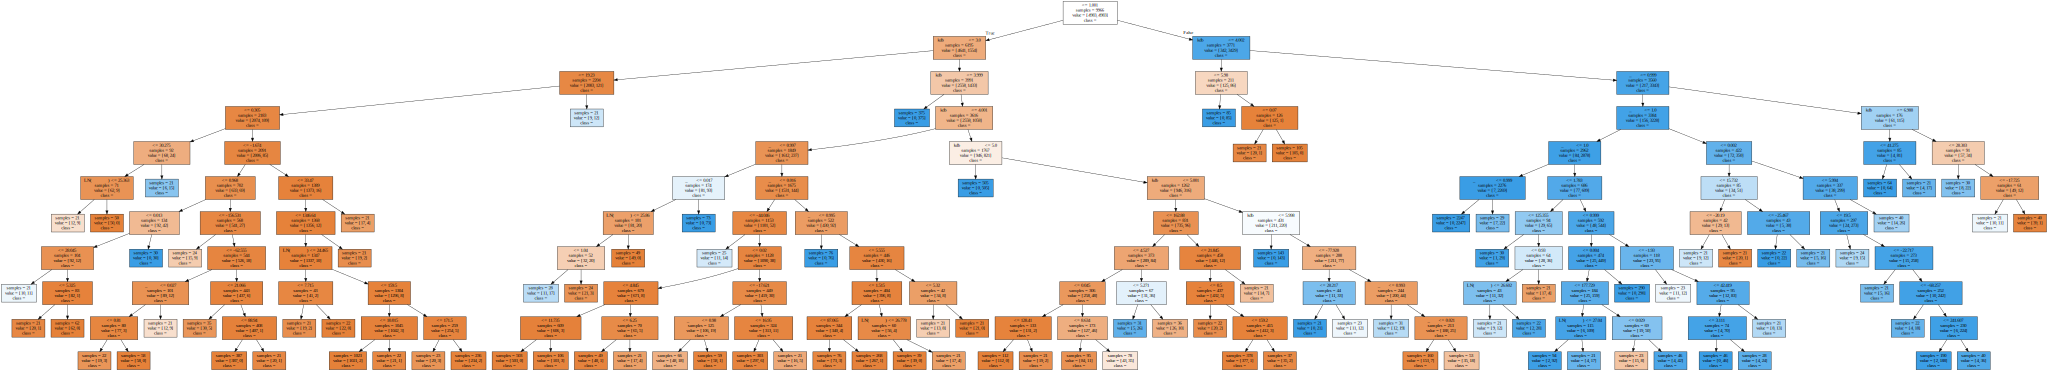

In [24]:
with open("tree.dot", encoding ="utf-8") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [25]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[2.22884815e-03 6.88820032e-03 1.37464489e-02 3.78572751e-03
 3.87347132e-02 0.00000000e+00 4.55863559e-03 7.58999986e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.99178801e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.51667615e-01 4.86325665e-01 6.52186425e-03
 2.27419080e-03 3.97113223e-03 6.55361761e-03 5.50443609e-03
 2.95657649e-03 1.57224612e-03 1.55894860e-03 7.09520481e-04
 2.05515403e-05 9.24891168e-03 0.00000000e+00 1.33997567e-03
 3.10703567e-04 8.14810816e-03 1.06964834e-02]


In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

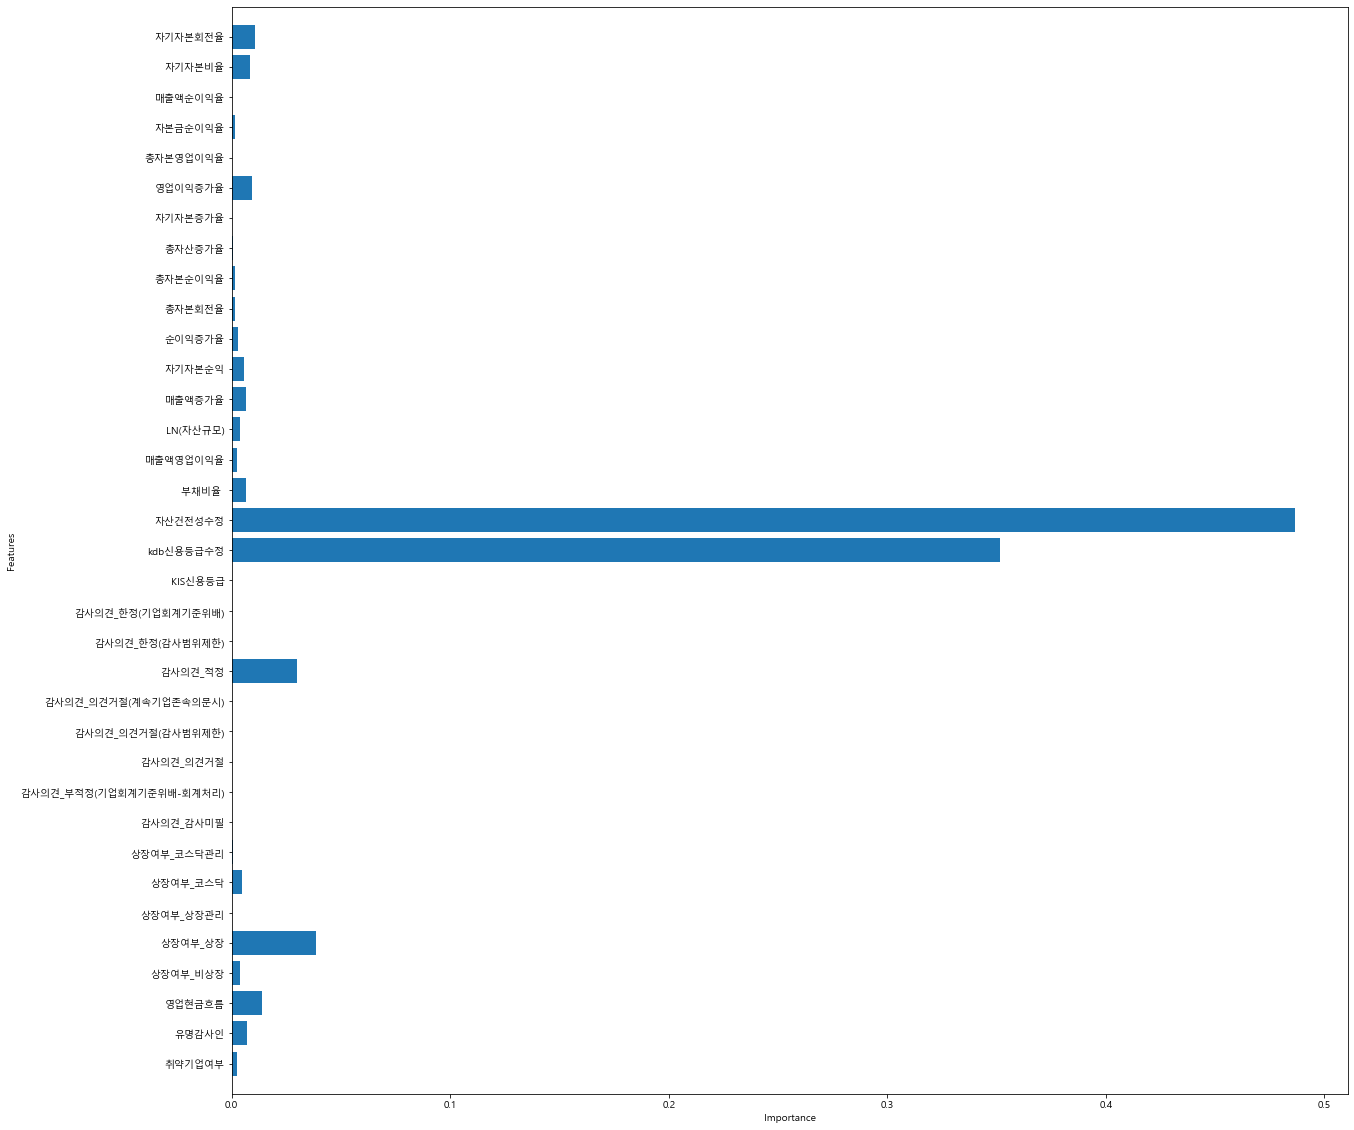

In [28]:
# This part is to plot the most important features
def plot_feature_importances_tree(model):
    plt.figure(figsize=(20,20))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), t)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_tree(tree)

# 4. 모델평가

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
#tree=DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)

In [31]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=21, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
pred_train=tree.predict(X_train)

In [34]:
confusion_train=confusion_matrix(y_train, pred_train)

In [35]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[4782  201]
 [ 220 4763]]


In [36]:
pred_test=tree.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[921  71]
 [ 19  30]]


In [37]:
from sklearn.metrics import classification_report

In [38]:
cfreport=classification_report(y_test, pred_test)

In [39]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
              precision    recall  f1-score   support

        0.0       0.98      0.93      0.95       992
        1.0       0.30      0.61      0.40        49

avg / total       0.95      0.91      0.93      1041

